# Week 15 Project


In [56]:
#Dependencies
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#modules for statistics
import math
import statistics
from scipy import stats

# Generate Dictionary of Artist Data

In [58]:
# Find a code to get all the artists from this api
# https://www.theaudiodb.com/api_guide.php
# theaudiodb.com/api/v1/json/1/search.php?s=coldplay

# empty list to be populated with artist info
artist_names = []

artist_data = {'artist_id':[],
               'artist_name':[],
               'gender':[],
               'member_count':[],
               'style':[], 
               'genre':[],
               'year_formed':[],
               'year_disbanded':[],
               'country_code':[],
               'label':[]}

In [59]:
#generate random numbers in the range of available artist IDs
#used to populate artist_names list
random.seed(66)
random_nums = [random.randint(100000, 170000) for i in range(1200)]

#test with known IDs and intentional errors
#random_nums = [112024, 0, 100000, 114364]

In [60]:
#this artist list uses a random number generator to test the database for artist IDs
#if an ID corresponds to an artist, it append the artist's information to info lists
#create a base url
#example: https://theaudiodb.com/api/v1/json/2/artist.php?i=112024
id_url = "https://theaudiodb.com/api/v1/json/2/artist.php?i="

#create a loop that uses random numbers list
for num in random_nums:
    unique_url = id_url + f'{num}'
    
    #call api url
    request = requests.get(unique_url)
    
    #for each attempt try to convert information to json
    try:
        #convert to json
        info = request.json()
        
    #exception json decode error
    #https://docs.python.org/3/tutorial/controlflow.html
    except json.JSONDecodeError:
        #end this iteration and continue new iteration of for loop
        continue
    #if json conversion successful then
    #try to create a variable for single artist to reference later
    try:
        artist = info['artists'][0]['strArtist']
        
    #TypeError exception if url responds with {'artists': None}
    except (TypeError):
        continue
        
    #if the artist is not already in the list then 
    if artist not in artist_names:
        
        #populate artist_names list using info(json)
        #response-> {'artists': [{'idArtist': '114364', 'strArtist': 'Beyoncé', ...
        #dictionary{'artists':['{dictionary}']}
        artist_data['artist_id'].append(info['artists'][0]['idArtist'])
        artist_data['artist_name'].append(info['artists'][0]['strArtist'])
        artist_data['gender'].append(info['artists'][0]["strGender"])
        artist_data['member_count'].append(info['artists'][0]["intMembers"])
        artist_data['style'].append(info['artists'][0]["strStyle"])
        artist_data['genre'].append(info['artists'][0]["strGenre"])
        artist_data['year_formed'].append(info['artists'][0]["intFormedYear"])
        artist_data['year_disbanded'].append(info['artists'][0]["strDisbanded"])
        artist_data['country_code'].append(info['artists'][0]['strCountryCode'])
        artist_data['label'].append(info['artists'][0]['strLabel'])


In [61]:
print(artist_data)

{'artist_id': ['140892', '132276', '158416', '133565', '112476', '164869', '124147', '161412', '168494', '116771', '121918', '153398', '160023', '166180', '169251', '114719', '150340', '127023', '161344', '126933', '141738', '163303', '140155', '126385', '138156', '126131', '141988', '146287', '153238', '140689', '111444', '152893', '135819', '115448', '145975', '162094', '154394', '152180', '113046', '155848', '141400', '162684', '148094', '128638', '124107', '141053', '140705', '137066', '162001', '142173', '160078', '144500', '167721', '122880', '137782', '113724', '145005', '148062', '115027', '152156', '121908', '120152', '123930', '113265', '155321', '113113', '139600', '150686', '130531', '164585', '111651', '122786', '163063', '148924', '112980', '134585', '156884', '127832', '135255', '154380', '145210', '152574', '122077', '127779', '118982', '132087', '115788', '151430', '115710', '121371', '135101', '168323', '149446', '154662', '129897', '114189', '141420', '140670', '1389

#### Convert Dictionary to DataFrame

In [62]:
artist_df = pd.DataFrame(artist_data)
artist_df

,artist_id,artist_name,gender,member_count,style,genre,year_formed,year_disbanded,country_code,label
0,140892,Ice Nine Kills,Male,4,,Metalcore,2006,None,US,None
1,132276,Savage,Male,1,Electronic,Synthpop,1983,None,IT,None
2,158416,Jason Hawk Harris,None,None,None,,0,None,,None
3,133565,Violent Work of Art,Mixed,4,,Industrial Metal,1994,None,SE,None
4,112476,James Horner,Male,1,Classical,OST,1979,None,US,None
...,...,...,...,...,...,...,...,...,...,...
927,130132,Marea,Male,5,Rock/Pop,Rock,1997,None,ES,None
928,168652,Marlene Dietrich,Female,1,,,None,None,DE,None
929,113975,Xandria,Mixed,4,Metal,Symphonic Metal,1997,None,DE,None
930,162484,Moaning,None,None,None,,0,None,,None


split data into multiple data frames for tables
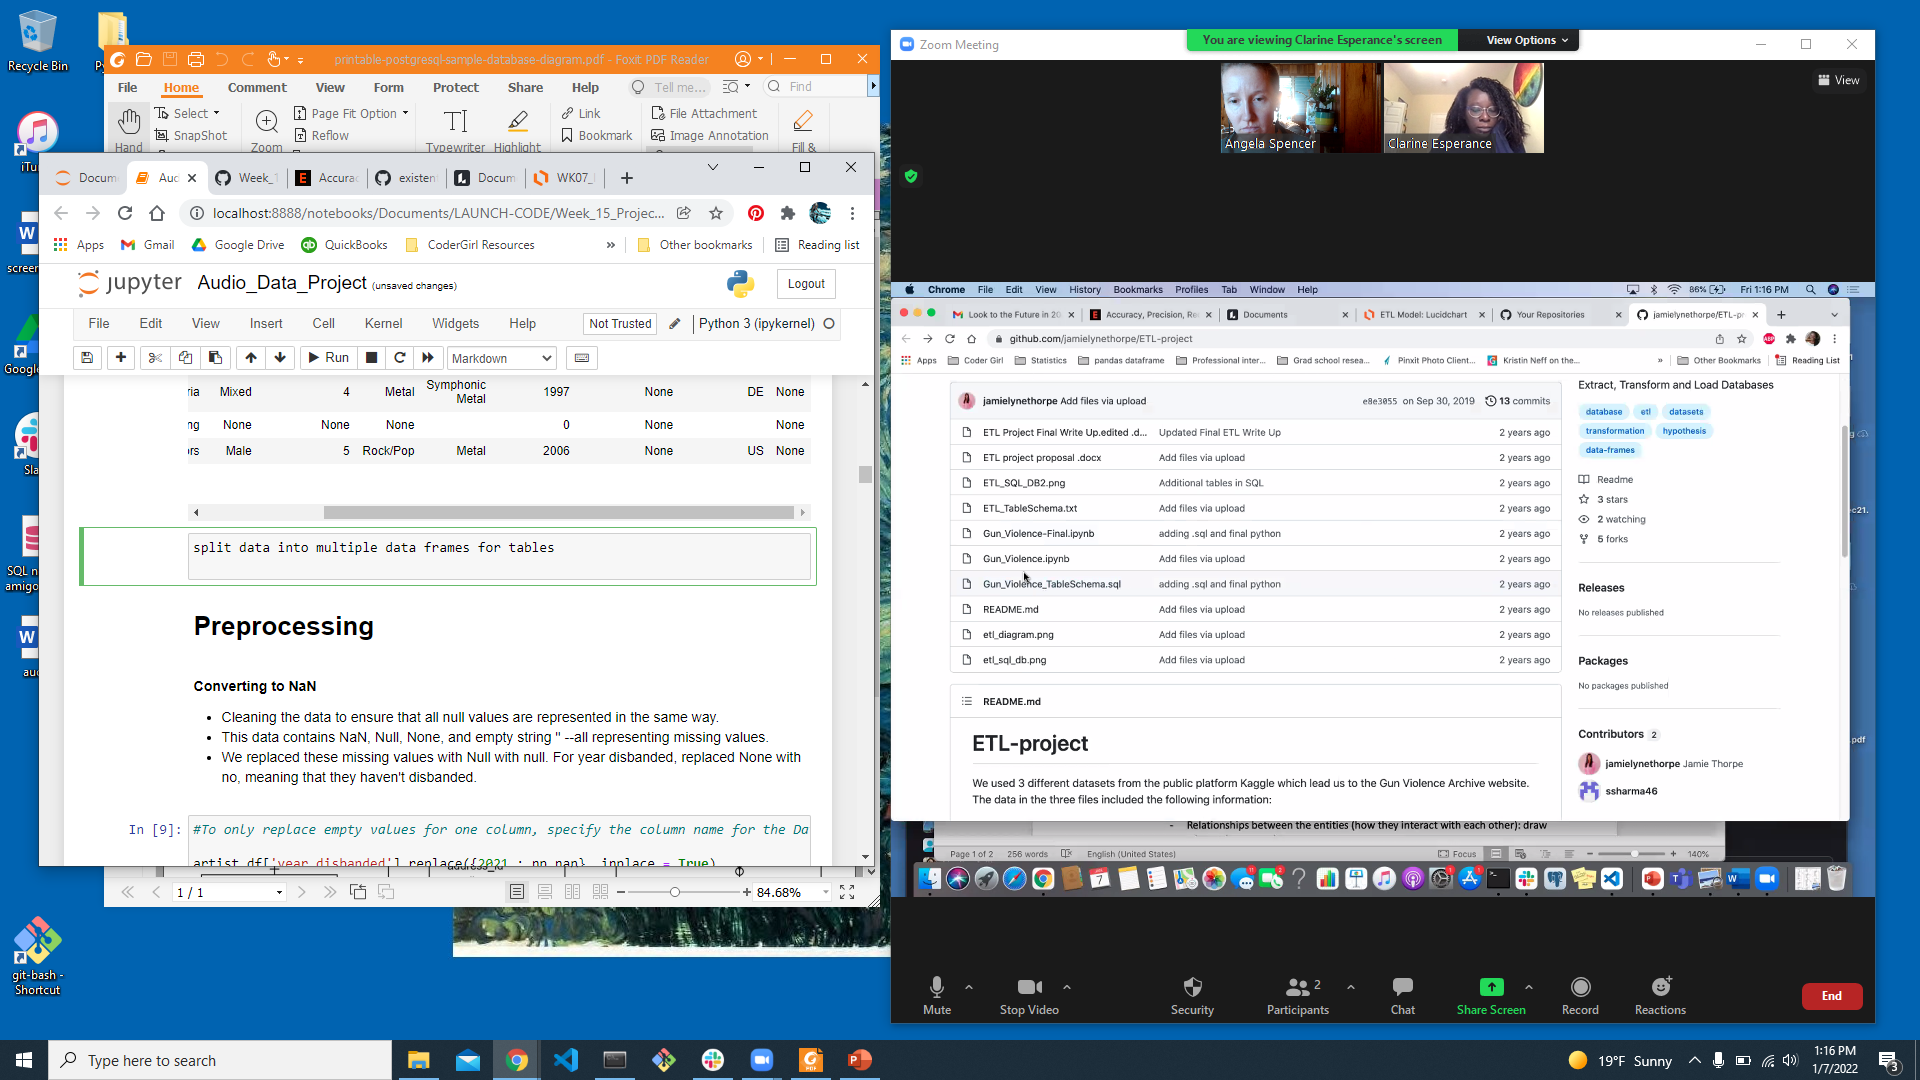

# Preprocessing

#### Converting to NaN
- Cleaning the data to ensure that all null values are represented in the same way.  
- This data contains NaN, Null, None, and empty string '' --all representing missing values.  
- We replaced these missing values with Null with null. For year disbanded, replaced None with no, meaning that they haven't disbanded.

In [9]:
#To only replace empty values for one column, specify the column name for the DataFrame:

artist_df['year_disbanded'].replace({2021 : np.nan}, inplace = True)
artist_df['year_formed'].replace({None: 'Null', '0' : np.nan}, inplace = True) 
#audio_df['gender'].replace({None: 'Null', '' : 'Null'}, inplace = True) 
#audio_df['location'].replace({None: 'Null', '' : 'Null'}, inplace = True)
#audio_df['style'].replace({'' : 'Null', None : 'Null'}, inplace = True)
#audio_df['genre'].replace({'' : 'Null'}, inplace = True)

audio_df.head(10)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,151479,Angèle Dubeau,Null,None,Null,Null,1962,None,Null
1,159955,Psychotic Waltz,Null,1,Null,Null,1986,None,Null
2,154348,張芸京,Female,1,Null,Null,1983,None,Null
3,143286,Fallulah,Female,1,Null,Folk,Null,None,Null
4,137170,Clémence Lhomme,Female,1,Folk,Pop,1989,None,"Suresnes, Ile de France"
5,138372,Katastrofialue,Null,None,Null,Null,1992,None,Null
6,114750,Vanilla Ice,Male,1,Urban/R&B,Hip-Hop,1985,None,"Dallas, Texas, USA"
7,116456,The Afters,Male,4,Rock/Pop,Null,1999,None,"Mesquite, Texas"
8,135310,Orbit,Null,None,Null,Null,1994,None,Null
9,154126,Ashley McBryde,Female,1,Null,Country,NaN,None,"Mammoth Spring, AR"


#### Cleaning Location Data
Found the country code to streamline location data

In [10]:
#replacing and correcting location strings
#replace strings that contain a given value with an entire string

audio_df.loc[audio_df['location'].str.contains
             ('US|American|New York|Sacramento|Colorado|Missouri|Chicago|Tennessee|California|Florida|Indiana|Texas|Los Angeles|Elk Grove Village|Arizona|Arlington', 
              na=False, case=False, regex=True), 'location'] = 'USA'
audio_df.loc[audio_df['location'].str.contains
             ('UK|England|English|Edinburgh|London|Scotland|Irish|Ireland|Manchester|United Kingdom|Nottingham|Croydon|Liverpool', 
              na=False, case=False, regex=True), 'location'] = 'UK'
audio_df.loc[audio_df['location'].str.contains
             ('German|Deutsch|Deutch', 
              na=False, case=False, regex=True), 'location'] = 'Germany'
audio_df.loc[audio_df['location'].str.contains
             ('Italia|Italy|Livorno', 
              na=False, case=False, regex=True), 'location'] = 'Italy'
audio_df.loc[audio_df['location'].str.contains
             ('France|French|Livorno|Paris', 
              na=False, case=False, regex=True), 'location'] = 'France'
audio_df.loc[audio_df['location'].str.contains
             ('Belgium', 
              na=False, case=False, regex=True), 'location'] = 'Belgium'
audio_df.loc[audio_df['location'].str.contains
             ('Greece|Greek', 
              na=False, case=False, regex=True), 'location'] = 'Greece'
audio_df.loc[audio_df['location'].str.contains
             ('Switzerland|Swiss', 
              na=False, case=False, regex=True), 'location'] = 'Switzerland'
audio_df.loc[audio_df['location'].str.contains
             ('Canada|Canadian|Ontario', 
              na=False, case=False, regex=True), 'location'] = 'Canada'
audio_df.loc[audio_df['location'].str.contains
             ('Melbourne|Australia', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Japan|Japanese', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Poznań|Poland', 
              na=False, case=False, regex=True), 'location'] = 'Poland'
audio_df.loc[audio_df['location'].str.contains
             ('Россия|Moscow', 
              na=False, case=False, regex=True), 'location'] = 'Russia'
audio_df.loc[audio_df['location'].str.contains
             ('Portugal', 
              na=False, case=False, regex=True), 'location'] = 'Portugal'
audio_df.loc[audio_df['location'].str.contains
             ('Swede|Gothenburg', 
              na=False, case=False, regex=True), 'location'] = 'Sweden'
audio_df.loc[audio_df['location'].str.contains
             ('Odense', 
              na=False, case=False, regex=True), 'location'] = 'Denmark'
audio_df.loc[audio_df['location'].str.contains
             ('Dutch|Netherlands', 
              na=False, case=False, regex=True), 'location'] = 'Netherlands'
audio_df.loc[audio_df['location'].str.contains
             ('Zealand|Wellington', 
              na=False, case=False, regex=True), 'location'] = 'New Zealand'
audio_df.loc[audio_df['location'].str.contains
             ('Rumania', 
              na=False, case=False, regex=True), 'location'] = 'Romania'
audio_df.loc[audio_df['location'].str.contains
             ('South Africa', 
              na=False, case=False, regex=True), 'location'] = 'South Africa'
audio_df.loc[audio_df['location'].str.contains
             ('Argentina', 
              na=False, case=False, regex=True), 'location'] = 'Argentina'
audio_df.loc[audio_df['location'].str.contains
             ('Mexico', 
              na=False, case=False, regex=True), 'location'] = 'Mexico'


#### Dropping Null Data
We created variables to represent dataframes with the null values removed for a single column for further analysis

In [11]:
#REPLACE AND DROP NAN FOR INDIVIDUAL COLUMNS
#assign individual variables for individual columns with null dropped

#replace 'Null' with NaN for all values in location column, drop NaN
location_na = audio_df.replace({'location': r'Null'}, {'location': np.nan}, regex=True)
location_dropped = location_na.dropna(axis=0, subset=['location'], inplace=False)
#location_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
genre_na = audio_df.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_dropped = genre_na.dropna(axis=0, subset=['genre'], inplace=False)
#genre_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
gender_na = audio_df.replace({'gender': r'Null'}, {'gender': np.nan}, regex=True)
gender_dropped = gender_na.dropna(axis=0, subset=['gender'], inplace=False)
#gender_dropped

#replace 'Null' with NaN for all values in year_formed column, drop NaN
year_formed_na = audio_df.replace({'year_formed': r'Null'}, {'year_formed': np.nan}, regex=True)
year_formed_dropped = year_formed_na.dropna(axis=0, subset=['year_formed'], inplace=False)
#year_formed_dropped

# Analysis of the Data

## Location Analysis

Find the count and proportion of artists by location.

#### Location Count

In [32]:
#LOCATION COUNT - NULL DROPPED

#number of times each location appears in the dataframe
location_counts_dropped = location_dropped['location'].value_counts()

#series
location_counts_dropped

#create dictionary and convert to df
location_counts_dict = {'Artist Location':location_counts_dropped}
location_counts_df = pd.DataFrame(location_counts_dict)

#top 5 artist locations
location_top5 = location_counts_df.head(5)
location_top5

,Artist Location
USA,113
UK,44
Germany,18
Canada,12
Italy,11


#### Location Proportion

In [33]:
#LOCATION PROPORTION - NULL DROPPED

#proportion each location represents in the data
location_proportion_dropped = round(location_counts_dropped / location_counts_dropped.sum(), 3)

#series
location_proportion_dropped

#create dictionary and convert to df
location_proportion_dict = {'Artist Location Proportion':location_proportion_dropped}
location_proportion_df = pd.DataFrame(location_proportion_dict)

#top 5 by proportion
location_proportion_top5 = location_proportion_df.head(5)
location_proportion_top5

,Artist Location Proportion
USA,0.333
UK,0.130
Germany,0.053
Canada,0.035
Italy,0.032


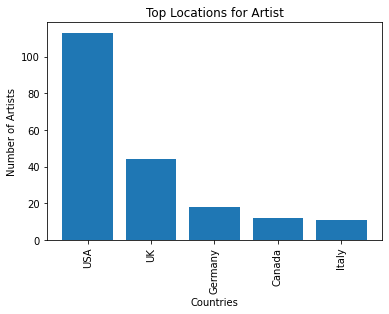

In [34]:
x = np.array(["USA", "UK", "Germany", "Canada", "Italy"])
y = np.array([113, 44, 18, 12, 11])

plt.bar(x,y)
plt.title('Top Locations for Artist')
plt.xlabel('Countries')
plt.ylabel('Number of Artists')
plt.xticks(rotation='vertical')
plt.show()


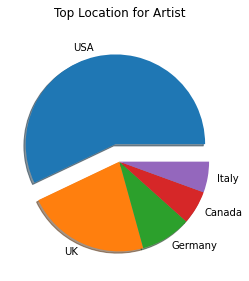

In [35]:
x = [113, 44, 18, 12, 11]
labels = ["USA", "UK", "Germany", "Canada", "Italy"]
myexplode = [0.2, 0, 0, 0, 0]

fig, ax = plt.subplots()
ax.pie(x, labels=labels, explode = myexplode, shadow = True)
ax.set_title('Top Location for Artist', y = 1.12)
plt.tight_layout()
plt.show()


## Genre Analysis

Find the mode, count, proportion of artists by genre.

#### Genre Mode

The value that appears most frequently in the genre column is Pop.

In [16]:
#The mode shows the most frequently occuring value in a column

statistics.mode(genre_dropped['genre'])

'Pop'

#### Genre Count

In [17]:
#GENRE COUNT - NULL DROPPED

#count of unique genres, excluding null values
genre_counts_dropped = genre_dropped['genre'].value_counts()

#series
genre_counts_dropped

#create dictionary and convert to df
genre_counts_dict = {'Genre Count':genre_counts_dropped}
genre_counts_df = pd.DataFrame(genre_counts_dict)

#top 10 by proportion
genre_counts_top10 = genre_counts_df.head(10)
genre_counts_top10

,Genre Count
Pop,37
Jazz,22
Rock,22
Hip-Hop,19
Classical,16
Indie,14
Rap,12
Electronic,11
Alternative Rock,11
R&B,10


#### Genre Proportion

In [18]:
#GENRE PROPORTION - NULL DROPPED

#proportion each genre represents in the data
genre_proportion_dropped = round(genre_counts_dropped / genre_counts_dropped.sum(), 3)

#series
genre_proportion_dropped

#create dictionary and convert to df
genre_proportion_dict = {'Genre Proportion':genre_proportion_dropped}
genre_proportion_df = pd.DataFrame(genre_proportion_dict)

#top 10 by proportion
genre_proportion_top10 = genre_proportion_df.head(10)
genre_proportion_top10

,Genre Proportion
Pop,0.090
Jazz,0.054
Rock,0.054
Hip-Hop,0.046
Classical,0.039
Indie,0.034
Rap,0.029
Electronic,0.027
Alternative Rock,0.027
R&B,0.024


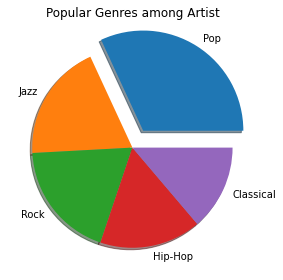

In [36]:
x = [37, 22, 22, 19, 16]
labels = ["Pop", "Jazz", "Rock", "Hip-Hop", "Classical"]
myexplode = [0.2, 0, 0, 0, 0]


fig, ax = plt.subplots()
ax.pie(x, labels=labels, explode = myexplode, shadow = True)
ax.set_title('Popular Genres among Artist')
plt.tight_layout()
plt.show()

# Pop music is the most popular among the artists

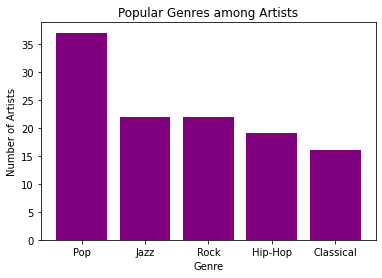

In [37]:
x = ["Pop", "Jazz", "Rock", "Hip-Hop", "Classical"]
y = [37, 22, 22, 19, 16]

plt.bar(x, y, color = "purple")
plt.title('Popular Genres among Artists')
plt.xlabel('Genre')
plt.ylabel('Number of Artists')
plt.show()

## Gender 

Find the mode, count, and proportion of artists by gender.

#### Gender Mode

Male artists and groups are more common that female or mixed gender groups.

In [21]:
statistics.mode(gender_dropped['gender'])

'Male'

#### Gender Count

In [22]:
#GENDER COUNT - NULL DROPPED

#count of unique genres, excluding null values
gender_counts_dropped = gender_dropped['gender'].value_counts()

#series
gender_counts_dropped

#create dictionary and convert to df
gender_counts_dict = {'Gender Count':gender_counts_dropped}
gender_counts_df = pd.DataFrame(gender_counts_dict)
gender_counts_df

,Gender Count
Male,303
Female,95
Mixed,44


#### Gender Proportion

In [23]:
#GENDER PROPORTION - NULL DROPPED

#proportion each genre represents in the data
gender_proportion_dropped = round(gender_counts_dropped / gender_counts_dropped.sum(), 2)

#series
gender_proportion_dropped

#create dictionary and convert to df
gender_proportion_dict = {'Gender Proportion':gender_proportion_dropped}
gender_proportion_df = pd.DataFrame(gender_proportion_dict)
gender_proportion_df

,Gender Proportion
Male,0.69
Female,0.21
Mixed,0.10


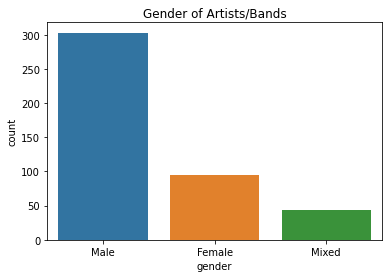

In [24]:
category_order = ['Male', 'Female', 'Mixed']

sns.countplot(x = gender_dropped['gender'], data = audio_df, order = category_order)
plt.title('Gender of Artists/Bands')
plt.show()

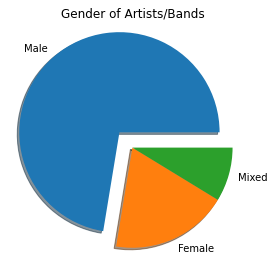

In [25]:
x = [307, 80, 37]
labels = ['Male', 'Female', 'Mixed']
myexplode = [0.2, 0, 0]

fig, ax = plt.subplots()
ax.pie(x, labels=labels, explode = myexplode, shadow = True)
ax.set_title('Gender of Artists/Bands')
plt.tight_layout()
plt.show()

## Year Formed

Find the minimum, maximum, and number of artists/bands formed per year.

In [26]:
#Find the max year
max_year_formed = year_formed_dropped['year_formed'].max()
max_year_formed

'2018'

In [27]:
#Find the max year
min_year_formed = year_formed_dropped['year_formed'].min()
min_year_formed

'1510'

In [28]:
#Find the number of band formed each year
year_count = year_formed_dropped.groupby('year_formed').size()

#create dictionary and convert to df
year_count_dict = {'Year Count':year_count}
year_count_df = pd.DataFrame(year_count_dict)
year_count_df

,Year Count
year_formed,
1510,1
1898,1
19,1
1904,1
1911,1
...,...
2014,5
2015,5
2016,3


## Analysis on Multiple Columns

Find the genres for the top 3 locations.

Find the years artists/bands were formed for the top 3 genres.

#### Genres by Top 3 Locations

An analysis of the genres in the top 3 countries

In [46]:
#Genre by Location
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'location' dropped
genre_location_na = location_na.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_location_dropped = genre_location_na.dropna(axis=0, subset=['genre'], inplace=False)
genre_location_na.dropna(axis=0, subset=['location'], inplace=False)
genre_location_dropped

#groupby location
genre_location_grouped = genre_location_dropped.groupby('location')

#count location by genre
genre_by_location = genre_location_grouped['genre'].value_counts()

#sort values in descending order
genre_by_location_sorted = genre_by_location.sort_values(ascending=False)

#isolate top 3 locations
genre_by_location_top3 = genre_by_location_sorted.loc[['USA', 'UK', 'Germany']]

genre_by_location_top3

#create dictionary and convert to df
genre_by_location_top3_dict = {'Genre by Location':genre_by_location_top3}
genre_by_location_top3_df = pd.DataFrame(genre_by_location_top3_dict)
genre_by_location_top3_df

Genre by Location
location genre                                
USA      Jazz                                9
         Rock                                9
         Hip-Hop                             8
         Pop                                 7
         Soul                                5
...                                        ...
Germany  Progressive Trance                  1
         R&B                                 1
         Rock                                1
         Rock & Roll                         1
         Violinist                           1

[81 rows x 1 columns]

#### Genres by Year

An analysis of the year that bands formed and the genre they play in.

In [30]:
#Genre by Year
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'year_formed' dropped
genre_year_na = genre_na.replace({'year_formed': r'Null'}, {'year_formed': np.nan}, regex=True)
genre_year_dropped = genre_year_na.dropna(axis=0, subset=['year_formed'], inplace=False)
genre_year_dropped

#groupby year formed
year_genre_grouped = genre_year_dropped.groupby('genre')

#count genre on year formed groupby
year_by_genre = year_genre_grouped['year_formed'].value_counts()

year_by_genre_top3 = year_by_genre.loc[['Pop', 'Jazz', 'Rock']]

#create dictionary and convert to df
year_by_genre_top3_dict = {'Genre by Year':year_by_genre_top3}
year_by_genre_top3_df = pd.DataFrame(year_by_genre_top3_dict)
year_by_genre_top3_df

Genre by Year
genre year_formed               
Pop   1983                     2
      1988                     2
      2011                     2
      1965                     1
      1973                     1
      1977                     1
      1979                     1
      1984                     1
      1985                     1
      1987                     1
      1989                     1
      1992                     1
      1993                     1
      1994                     1
      1995                     1
      1997                     1
      2000                     1
      2002                     1
      2007                     1
      2014                     1
      2017                     1
Jazz  1936                     1
      1942                     1
      1946                     1
      1956                     1
      1961                     1
      1976                     1
      1990                     1
Rock  1982                     2
      1961                     1
      1967                     1
      1968                     1
      1970                     1
      1974                     1
      1978                     1
      1983                     1
      1987                     1
      1988                     1
      1995                     1
      1999                     1
      2002                     1
      2007                     1
      2009                     1
      2012                     1